In [139]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN



In [2]:
df=pd.read_csv('pokemon.csv')
df.head()


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


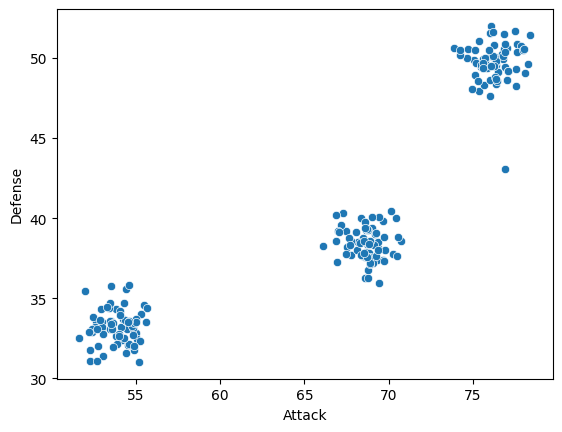

In [3]:
X = df[['Attack', 'Defense']]
sns.scatterplot(data=X,x='Attack', y='Defense');

In [4]:
kmeans=KMeans(n_clusters=3, init='k-means++', n_init=10,random_state=42)
kmeans.fit(X)
predictions=kmeans.predict(X)


In [5]:
df['Clusters_k3'] = predictions

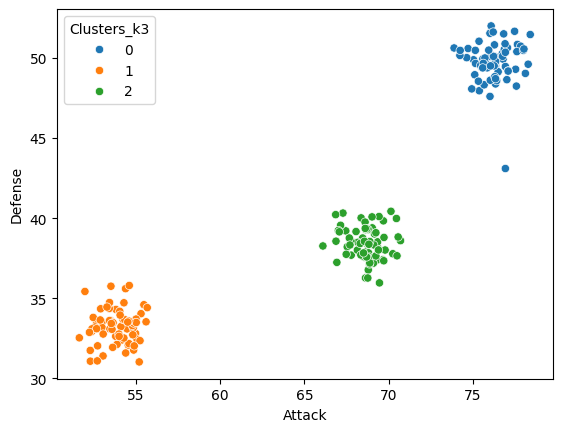

In [6]:
sns.scatterplot(x=df.Attack,y=df.Defense,hue=df['Clusters_k3'],palette="tab10");

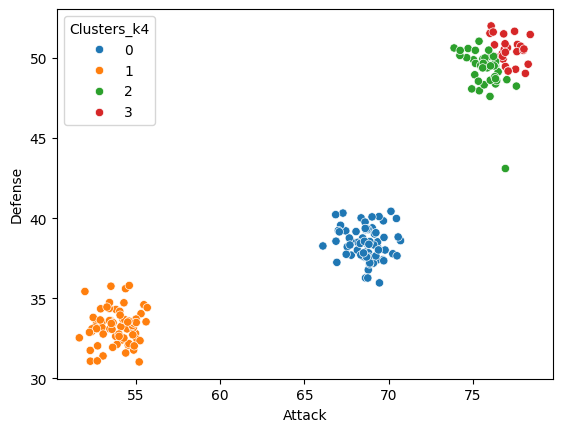

In [7]:
kmeans=KMeans(n_clusters=4, init='k-means++', n_init=10,random_state=42)
kmeans.fit(X)
predictions=kmeans.predict(X)  
df['Clusters_k4'] = predictions    
sns.scatterplot(x=df.Attack,y=df.Defense,hue=df['Clusters_k4'],palette="tab10");

In [8]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

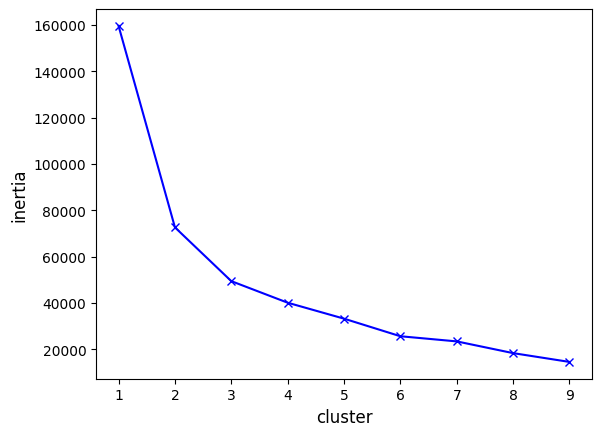

In [9]:
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-');

<Axes: xlabel='cluster', ylabel='silhouette'>

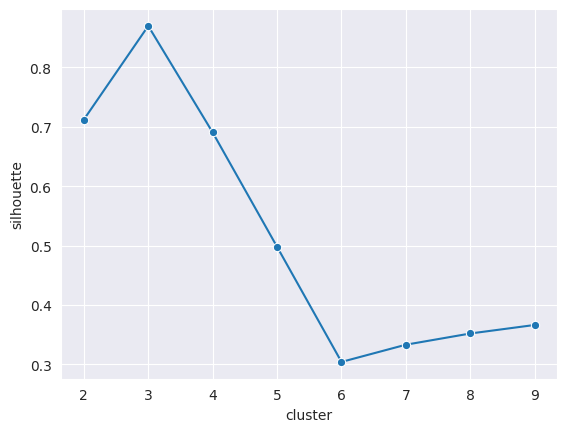

In [10]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [11]:
data=pd.read_csv('values_from_the_instrument.csv')
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


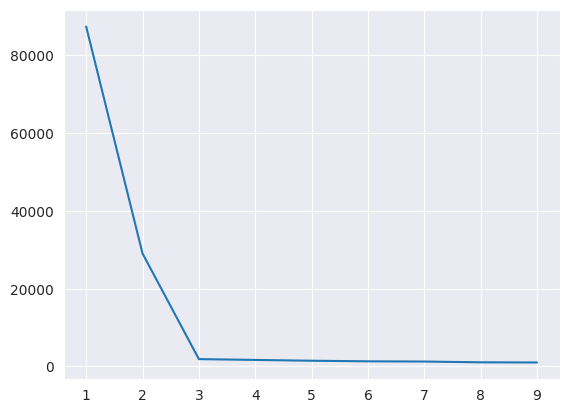

In [12]:
from sklearn.cluster import KMeans
kmean_lst=[]
num_clasters=[]
for n in range(1,10,1):
    Kmean=KMeans(n_clusters=n,random_state=42)
    Kmean.fit(data)
    kmean_lst.append(Kmean.inertia_)
    num_clasters.append(n)
  

sns.lineplot(x=(i for i in range(1,10)),y=kmean_lst)

KM=KMeans(n_clusters=3,random_state=42)
KM.fit(data)
pred_data=KM.labels_
data['kmean']= pred_data
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   kmean   1000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 19.7 KB


<Axes: xlabel='x1', ylabel='x2'>

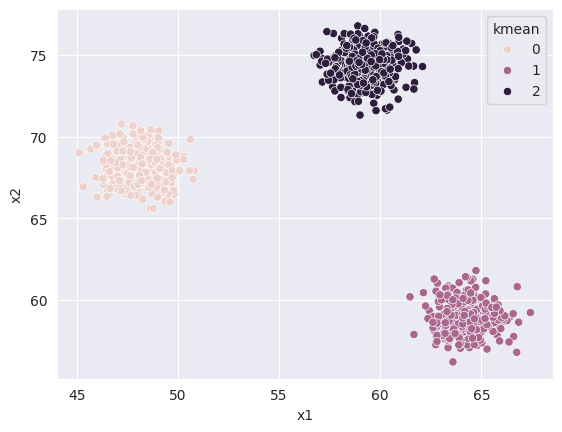

In [13]:
data.info()

sns.scatterplot(x=data.x1,y=data.x2,hue=data.kmean)

<Axes: >

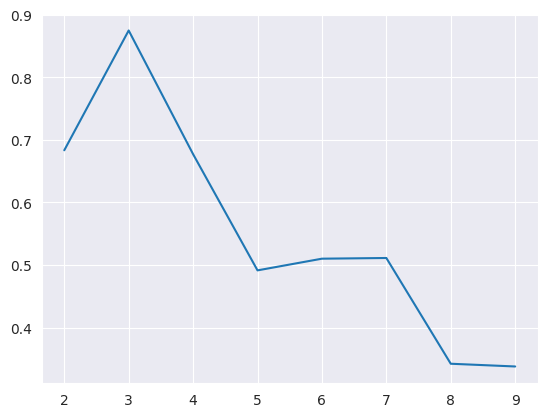

In [14]:
from sklearn.cluster import KMeans
silhouette_lst=[]
num_clasters=[]
for n in range(2,10):
    Kmean=KMeans(n_clusters=n,random_state=42)
    Kmean.fit(data)
    silhouette_lst.append(silhouette_score(X=data,labels=Kmean.predict(data),random_state=42))
    num_clasters.append(n)

sns.lineplot(x=num_clasters,y=silhouette_lst)
    

In [15]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
#> 1.0
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))
#> 1.0

1.0
1.0


In [16]:
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


In [17]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

In [18]:
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
#> 1.0
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
#> 0.829867483307009

1.0
0.8334191510029214


In [19]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
#>1.0

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
#>0.9070246789753754

1.0
0.9091419717602737


In [20]:
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]).round(2))

0.74


In [21]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
agglomerative_clustering.fit(X)

AgglomerativeClustering(n_clusters=3)

In [22]:
agglomerative_clustering.labels_


array([0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1])

In [23]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

<Axes: xlabel='Attack', ylabel='Defense'>

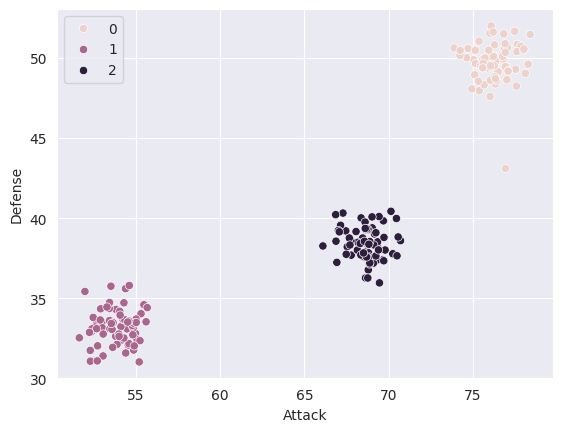

In [24]:
sns.scatterplot(x=X.Attack,y=X.Defense,hue=gm_prediction)

In [25]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)




Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

In [26]:
dat=pd.read_csv('housing.zip')
dat.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<Axes: xlabel='year', ylabel='price'>

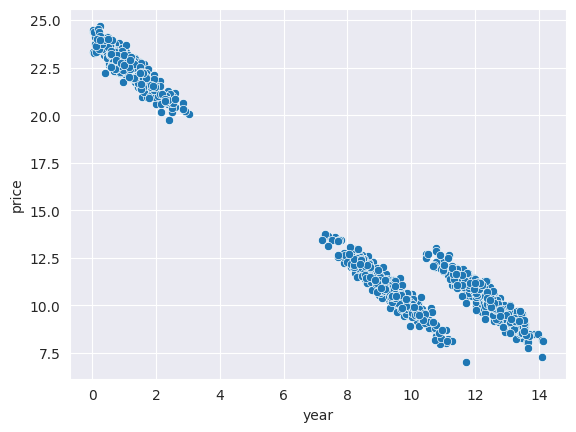

In [27]:
sns.scatterplot(x=dat.year,y=dat.price)

In [28]:
GM=GaussianMixture(n_components=3,random_state=42)
GM.fit(dat)
GM_predict=GM.predict(dat)

<Axes: xlabel='year', ylabel='price'>

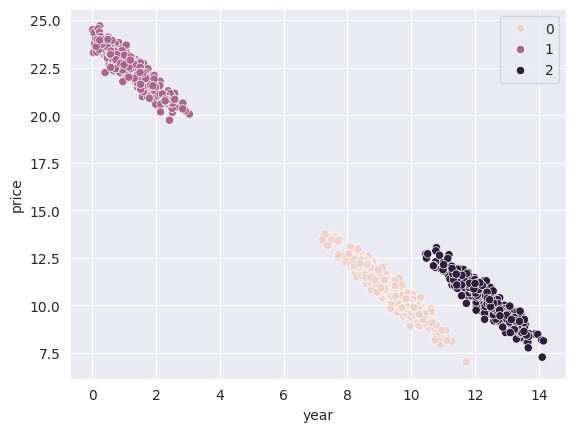

In [29]:
sns.scatterplot(x=dat.year,y=dat.price,hue=GM_predict)

In [30]:
set(GM_predict)

{0, 1, 2}

<Axes: xlabel='year', ylabel='price'>

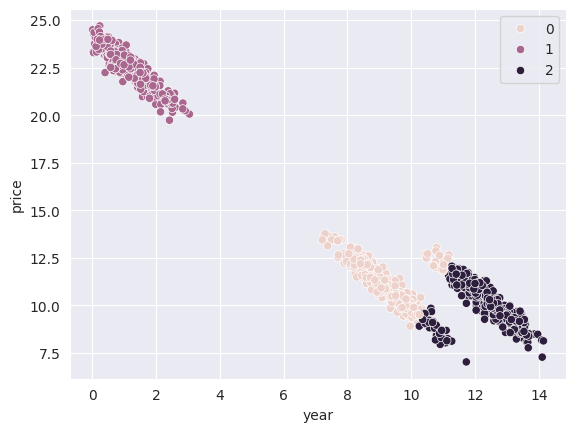

In [31]:
kmeans_house=KMeans(n_clusters=3,random_state=42)
model_km=kmeans_house.fit(dat)
km_predict=model_km.predict(dat)

sns.scatterplot(x=dat.year,y=dat.price,hue=km_predict)



In [32]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<Axes: xlabel='Attack', ylabel='Defense'>

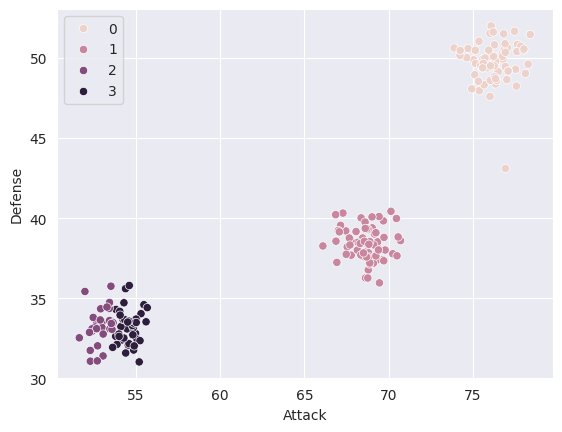

In [33]:
sns.scatterplot(x=df.Attack,y=df.Defense,hue=spectral_predictions)

<Axes: xlabel='Attack', ylabel='Defense'>

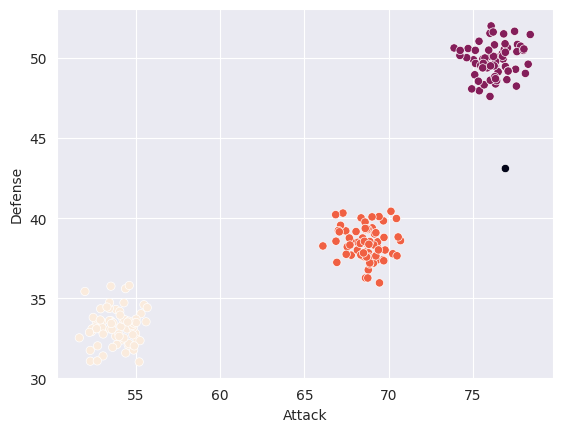

In [34]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

<Axes: xlabel='year', ylabel='price'>

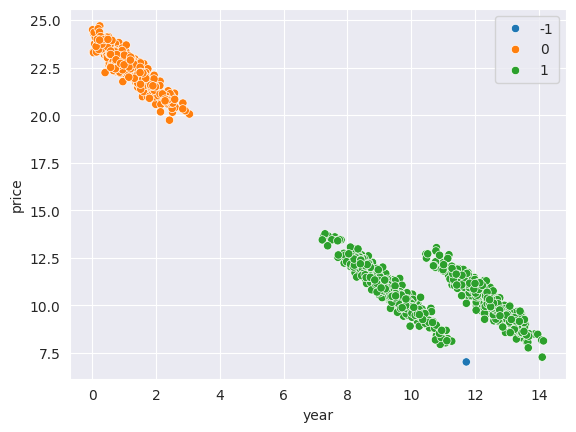

In [35]:
DBSC=DBSCAN(eps = 1.15, min_samples = 2)
DBSC.fit(dat)
sns.scatterplot(x=dat.year,y=dat.price,hue=DBSC.labels_,palette='tab10')


In [36]:
data_airbnb=pd.read_csv('airbnb.zip')
data_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [37]:
data_airbnb[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
345,40.68613,-73.96536
346,40.68048,-73.94911
347,40.68314,-73.93963
348,40.75961,-73.91117


In [38]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_cl=AgglomerativeClustering(n_clusters=6, linkage='complete')


In [39]:
predictions_ag_model = agglomerative_clustering.fit_predict(data_airbnb[['latitude', 'longitude']])
from scipy.cluster.hierarchy import dendrogram, linkage


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [82.5, 82.5, 120.0, 120.0],
  [60.0, 60.0, 101.25, 101.25],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [145.0, 145.0, 163.75, 163.75],
  [80.625, 80.625, 154.375, 154.375],
  [195.0, 195.0, 205.0, 205.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [235.0, 235.0, 253.75, 253.75],
  [225.0, 225.0, 244.375, 244.375],
  [215.0, 215.0, 234.6875, 234.6875],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [224.84375, 224.84375, 300.0, 300.0],
  [200.0, 200.0, 262.421875, 262.421875],
  [325.0, 325.0, 335.0, 335.0],
  [375.0, 375.0, 385.0

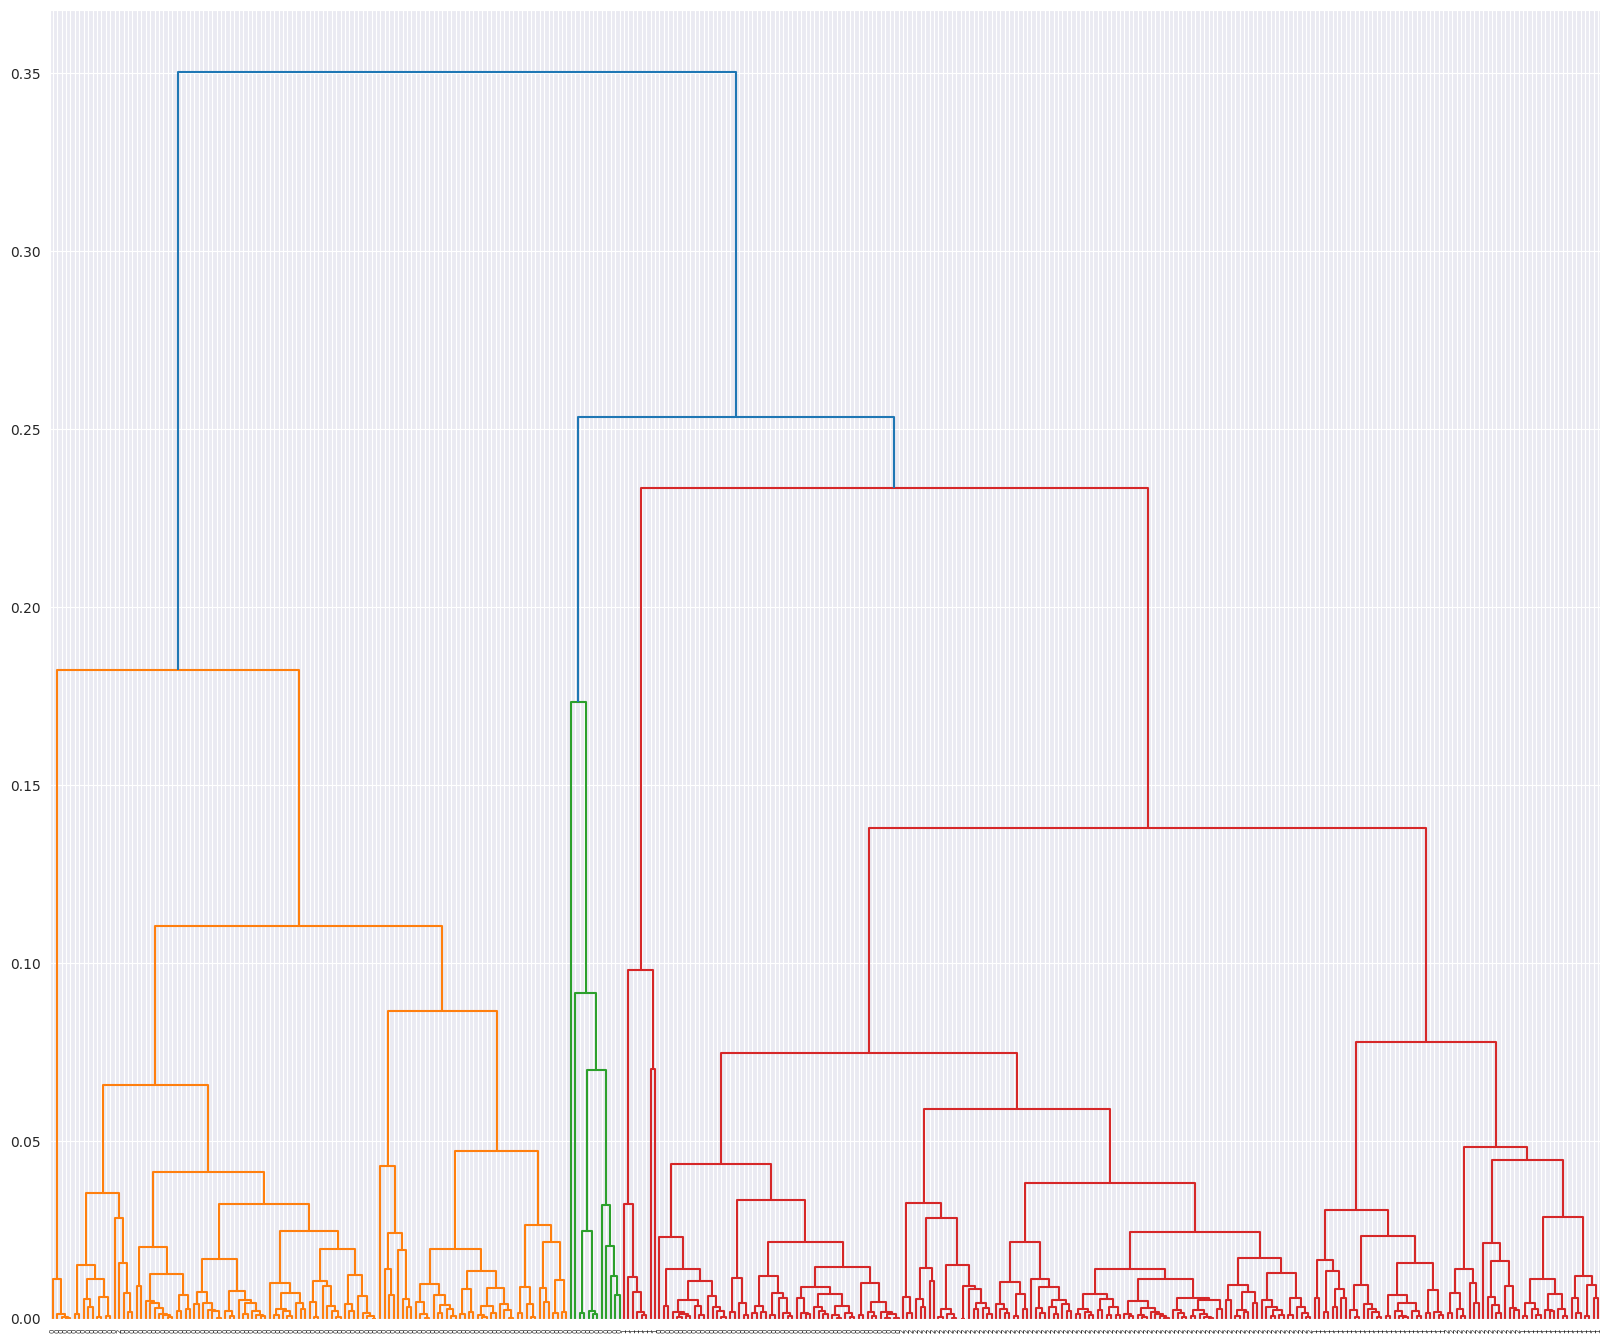

In [40]:
# рассчитаем расстояния между кластерами
linked = linkage(data_airbnb[["latitude", "longitude"]], 'complete')
plt.figure(figsize=(20, 17))
# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort=True)

<Axes: xlabel='latitude', ylabel='longitude'>

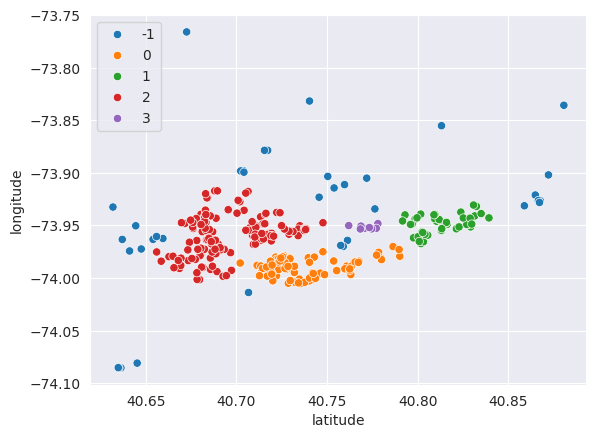

In [41]:
from sklearn.cluster import DBSCAN
DB=DBSCAN(eps=0.012, min_samples=6)
DB_predict=DB.fit_predict(data_airbnb[["latitude", "longitude"]])
sns.scatterplot(x=data_airbnb.latitude,y=data_airbnb.longitude,hue=DB_predict,palette="tab10")

In [42]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [43]:
X 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
pd.DataFrame(train_x_pca) 

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-4.147671,2.090282,1.062715,-2.741350,-1.835794,-2.056039,-0.871026,-4.316753,-0.792733,-1.792116,...,-0.305660,-0.811489,0.116079,0.457641,-0.340847,0.158258,-0.377176,-0.129155,0.012525,-0.867066
1,-4.767906,-3.553939,1.638870,-2.596968,0.077013,0.568730,-1.507203,-0.350936,0.340954,-3.114706,...,-0.129601,0.491430,-0.385544,-0.878406,-0.025145,-0.384856,0.411946,0.222668,0.035301,-0.914102
2,22.327138,-2.761222,-3.533189,0.590369,14.717573,-6.444564,-3.590256,-4.213789,-4.011637,-4.287741,...,-0.490627,0.305441,0.634171,0.001745,-0.650192,-0.437752,-0.762742,0.294259,-0.669297,0.139077
3,3.704228,-0.545527,4.186207,-9.105312,-0.085315,-2.575647,-0.037214,1.196497,-0.604119,1.229103,...,0.604927,-1.071761,-0.147879,-1.379505,0.304571,0.007620,-0.891625,0.735492,0.033930,-0.709771
4,5.777142,5.902715,-6.154166,1.137045,2.125341,-2.195221,4.596637,-2.882363,-3.196081,-2.454848,...,-0.308400,0.109426,-0.526405,-0.272639,-0.596488,0.212091,-0.772391,0.534824,0.324060,-0.074657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,-5.050280,5.213830,-5.801930,0.236532,-0.238669,-3.488228,0.846122,2.171711,-4.211257,1.163457,...,-0.780536,-0.000483,-0.332886,-0.148355,0.208190,0.309810,-0.026041,0.581059,-0.521394,-0.032775
62996,-2.031079,-0.750741,1.036435,-4.878131,-2.799822,0.636535,-0.843158,-5.277420,-1.962490,-1.455944,...,0.520529,-0.007577,1.547508,-0.136290,-0.539294,0.447374,-0.309353,-0.014543,-0.538904,0.502215
62997,-2.027813,2.792621,-4.251098,-0.818681,1.840383,5.578336,-4.956960,3.454502,-4.388199,-0.639897,...,-0.189092,0.061592,0.184353,-0.185495,-0.269197,0.061770,-0.075297,-0.130729,0.017764,-0.146035
62998,-6.151705,-3.397343,4.608314,0.697772,5.047401,1.940828,3.266430,-4.328843,-1.289953,-3.002307,...,0.224808,0.131717,-0.303173,0.179819,0.150905,0.052455,-0.220688,0.426424,-0.083559,-0.231266


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    delta_time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return delta_time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")
# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 41.27346849441528, метрика модели 0.925
Модель, построенная на всех исходных признаках. Время обучения 62.612037897109985, метрика модели 0.9185714285714286


In [85]:
import pandas as pd
import numpy as np

In [126]:
df_seg=pd.read_csv('segmented_customers.csv')
df_seg.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19.0,15.0,39.0,4.0
1,2,Male,21.0,15.0,81.0,3.0
2,3,Female,20.0,16.0,6.0,4.0
3,4,Female,23.0,16.0,77.0,3.0
4,5,Female,31.0,17.0,40.0,4.0


In [87]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              205 non-null    int64  
 1   Gender                  205 non-null    object 
 2   Age                     203 non-null    float64
 3   Annual Income (k$)      203 non-null    float64
 4   Spending Score (1-100)  204 non-null    float64
 5   cluster                 201 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.7+ KB


In [88]:
df_seg.isnull().sum()

CustomerID                0
Gender                    0
Age                       2
Annual Income (k$)        2
Spending Score (1-100)    1
cluster                   4
dtype: int64

In [89]:
df_seg[df_seg['cluster'].isna()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
201,202,Female,30.0,127.0,NaN,NaN
202,203,Male,80.0,NaN,20.0,NaN
203,204,Male,NaN,16.0,120.0,NaN
204,205,Female,NaN,9.0,80.0,NaN


Данных не так много, можно и удалить пустые.

In [91]:
df_seg[df_seg.isna().any(axis=1)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
200,201,Female,21.0,NaN,40.0,0.0
201,202,Female,30.0,127.0,NaN,NaN
202,203,Male,80.0,NaN,20.0,NaN
203,204,Male,NaN,16.0,120.0,NaN
204,205,Female,NaN,9.0,80.0,NaN


In [127]:
df_seg=df_seg.dropna()

In [128]:
df_seg

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19.0,15.0,39.0,4.0
1,2,Male,21.0,15.0,81.0,3.0
2,3,Female,20.0,16.0,6.0,4.0
3,4,Female,23.0,16.0,77.0,3.0
4,5,Female,31.0,17.0,40.0,4.0
...,...,...,...,...,...,...
195,196,Female,35.0,120.0,79.0,1.0
196,197,Female,45.0,126.0,28.0,2.0
197,198,Male,32.0,126.0,74.0,1.0
198,199,Male,32.0,137.0,18.0,2.0


In [129]:
df_seg.duplicated('CustomerID').sum()

0

In [130]:
df_seg[df_seg.duplicated(subset=['CustomerID'])]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster


In [131]:
df_seg.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

In [132]:
import plotly
import plotly.express as px

fig=px.scatter_3d(
    data_frame=df_seg,
    x='annual_income',
    y='spending_score',
    z='age',
    width=800,
    height=600
    
)
fig.show()

In [133]:
def get_3d_visualization(df, clust_res):
    fig = px.scatter_3d(
        data_frame=df, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

In [134]:
X=df_seg[['age','annual_income','spending_score']]
X

,age,annual_income,spending_score
0,19.0,15.0,39.0
1,21.0,15.0,81.0
2,20.0,16.0,6.0
3,23.0,16.0,77.0
4,31.0,17.0,40.0
...,...,...,...
195,35.0,120.0,79.0
196,45.0,126.0,28.0
197,32.0,126.0,74.0
198,32.0,137.0,18.0


In [136]:
cor=df_seg.corr()['cluster'].abs().sort_values(ascending=True)

cor

spending_score    0.205275
annual_income     0.323277
customer_id       0.329366
age               0.544222
cluster           1.000000
Name: cluster, dtype: float64

In [137]:

px.bar(x=cor.index,y=cor,width=600,height=600)

In [151]:
DBS=DBSCAN(eps=9,min_samples=3)
predict=DBS.fit_predict(X)
get_3d_visualization(df_seg,predict)

In [152]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

In [154]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [153]:
numbers_cluster=get_aggl_clustering(X,3)


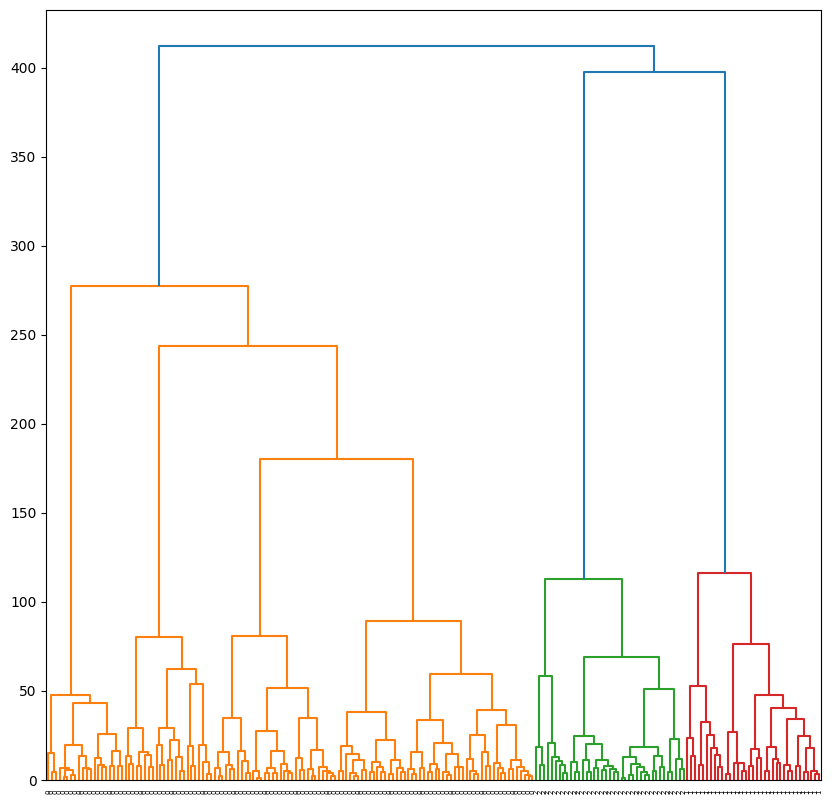

In [161]:
linked = linkage(X,'ward')
plt.figure(figsize=(10, 10))
dendrogram(Z=linked,
            orientation='top',
            labels=numbers_cluster,
            distance_sort='ascending')

plt.show()

In [162]:
agl_labels=get_aggl_clustering(X, 6)
get_3d_visualization(X,agl_labels)


In [163]:
from sklearn.metrics import silhouette_score # метрика метод силуэта.

In [167]:
silhouette_score(X=X,labels=agglomerative_clustering.labels_,random_state=42)

0.2992593203550994

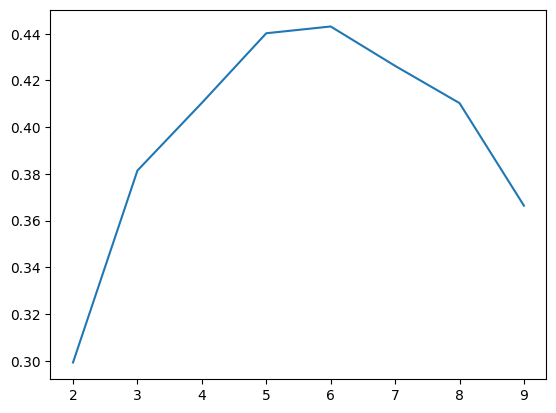

In [169]:
silhouette_lst=[]
num_clasters=[]
for n in range(2,10):
    agglomerative_clustering=AgglomerativeClustering(n_clusters=n, linkage='ward')
    agglomerative_clustering.fit(X)
    silhouette_lst.append(silhouette_score(X=X,labels=agglomerative_clustering.labels_,random_state=42))    
    num_clasters.append(n)

sns.lineplot(x=num_clasters,y=silhouette_lst);

In [ ]:
from sklearn.metrics import silhouette_score # метрика метод силуэта.
from sklearn.cluster import KMeans
silhouette_lst=[]
num_clasters=[]
for n in range(2,10):
    Kmean=KMeans(n_clusters=n,random_state=42)
    Kmean.fit(data)
    silhouette_lst.append(silhouette_score(X=data,labels=Kmean.predict(data),random_state=42))
    num_clasters.append(n)

sns.lineplot(x=num_clasters,y=silhouette_lst)

In [ ]:
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

In [1]:
from sklearn import linear_model

In [ ]:
reg_l=linear_model.LinearRegression()